In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile, os
import shutil

C:\Users\MoKha\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\MoKha\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


## RAFDB

In [2]:
data_dir = 'D:\\Kuliah\\UPI\\SEMESTER 7\\skripsi\\RAFDB\\tambah_RAFDB'

class_map = {
    'Angry': 0,
    'Disgust': 1,
    'Fear': 2,
    'Happy': 3,
    'Sad': 4,
    'Surprise': 5,
    'Neutral': 6,
}

In [3]:
image_data = []
labels = []
usages = []

# Loop untuk setiap folder (kelas)
for class_folder in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_folder)

    # Pastikan folder yang diambil adalah folder valid (bukan file atau lainnya)
    if os.path.isdir(class_path):
        label = class_map[class_folder]  # Ambil label sesuai map kelas

        # Loop untuk setiap gambar dalam folder kelas tersebut
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)

            # Load gambar dengan OpenCV dalam bentuk grayscale
            image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

            # Pastikan gambar terbaca dengan benar
            if image is not None:
                # Resize gambar ke ukuran tetap jika diperlukan, misalnya 48x48
                image = cv2.resize(image, (48, 48))

                # Flatten gambar menjadi 1D array dan ubah ke string terpisah dengan spasi
                image_flat = ' '.join(map(str, image.flatten()))

                # Simpan gambar dan labelnya
                image_data.append(image_flat)
                labels.append(label)
                usages.append("Training")

In [4]:
df = pd.DataFrame({
    ' pixels': image_data,
    'emotion': labels,
    ' Usage': usages  # Kolom Usage dengan nilai "Training"
})

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15339 entries, 0 to 15338
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0    pixels  15339 non-null  object
 1   emotion  15339 non-null  int64 
 2    Usage   15339 non-null  object
dtypes: int64(1), object(2)
memory usage: 359.6+ KB


In [11]:
df.isnull().sum()

 pixels    0
emotion    0
 Usage     0
dtype: int64

In [12]:
duplicate_count = df.duplicated(subset=' pixels').sum()

print(f"Number of duplicate rows': {duplicate_count}")

Number of duplicate rows': 3


In [13]:
data_new = df.drop_duplicates(subset=' pixels')

In [14]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15336 entries, 0 to 15338
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0    pixels  15336 non-null  object
 1   emotion  15336 non-null  int64 
 2    Usage   15336 non-null  object
dtypes: int64(1), object(2)
memory usage: 479.2+ KB


In [15]:
duplicate_count = data_new.duplicated(subset=' pixels').sum()

print(f"Number of duplicate rows': {duplicate_count}")

Number of duplicate rows': 0


In [17]:
from facenet_pytorch import MTCNN
import torch
from PIL import Image
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
import cv2

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
mtcnn = MTCNN(
    image_size=160, margin=0, min_face_size=10,
    thresholds=[0.6, 0.7, 0.7], factor=0.709, post_process=True,
    device=device
)

In [18]:
def pixels_to_image(pixels_str):
    pixels = np.fromstring(pixels_str, sep=' ').astype(np.uint8)
    img = pixels.reshape(48, 48)  # Assuming image size is 48x48
    return Image.fromarray(cv2.cvtColor(img, cv2.COLOR_GRAY2RGB))

# Detect faces in dataset
def detect_faces(df):
    face_detected = []

    for i, row in df.iterrows():
        img = pixels_to_image(row[' pixels'])  # Convert pixels to image
        x_aligned, prob = mtcnn(img, return_prob=True)
        print(f'Image: {i+1}, Prob: {prob}')
        if x_aligned is not None:
            face_detected.append(1)  # Face detected
        else:
            face_detected.append(0)  # No face detected

    return face_detected

In [19]:
data_new['face_detected'] = detect_faces(data_new)

Image: 1, Prob: 0.9954403638839722
Image: 2, Prob: 0.9997681975364685
Image: 3, Prob: 0.9997356534004211
Image: 4, Prob: None
Image: 5, Prob: 0.9999449253082275
Image: 6, Prob: 0.999869704246521
Image: 7, Prob: 0.9999172687530518
Image: 8, Prob: 0.9968942403793335
Image: 9, Prob: None
Image: 10, Prob: 0.9934946894645691
Image: 11, Prob: 0.9593986868858337
Image: 12, Prob: 0.9972165822982788
Image: 13, Prob: 0.9999836683273315
Image: 14, Prob: 0.9872148036956787
Image: 15, Prob: 0.9990085959434509
Image: 16, Prob: None
Image: 17, Prob: None
Image: 18, Prob: 0.9957942962646484
Image: 19, Prob: 0.9976925849914551
Image: 20, Prob: 0.9989732503890991
Image: 21, Prob: 0.9950799942016602
Image: 22, Prob: None
Image: 23, Prob: 0.9999614953994751
Image: 24, Prob: 0.9999938011169434
Image: 25, Prob: 0.9965457320213318
Image: 26, Prob: 0.9933778643608093
Image: 27, Prob: 0.9999831914901733
Image: 28, Prob: 0.9995834231376648
Image: 29, Prob: 0.9997496008872986
Image: 30, Prob: None
Image: 31, Pro

C:\Users\MoKha\AppData\Local\Temp\ipykernel_4428\2567010068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['face_detected'] = detect_faces(data_new)


In [20]:
data_new[data_new['face_detected'] == 0]

,pixels,emotion,Usage,face_detected
3,43 41 41 47 47 46 48 51 51 50 50 51 51 53 55 5...,0,Training,0
8,255 254 252 252 254 254 253 252 254 255 255 25...,0,Training,0
15,193 193 194 195 196 197 199 200 203 205 206 20...,0,Training,0
16,133 136 137 141 144 144 142 141 145 145 143 14...,0,Training,0
21,74 75 77 94 90 95 91 99 110 119 120 152 169 18...,0,Training,0
...,...,...,...,...
15328,79 165 136 81 91 84 80 25 35 27 32 19 27 35 41...,5,Training,0
15330,104 111 125 137 145 155 161 168 174 178 184 18...,5,Training,0
15333,1 3 2 7 7 7 8 12 19 24 27 30 34 36 39 42 43 47...,5,Training,0
15337,10 10 10 10 14 29 38 44 51 56 60 63 68 72 73 7...,5,Training,0


In [39]:
data_final = data_new[data_new['face_detected'] == 1]

In [22]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11530 entries, 0 to 15336
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0    pixels        11530 non-null  object
 1   emotion        11530 non-null  int64 
 2    Usage         11530 non-null  object
 3   face_detected  11530 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 450.4+ KB


In [23]:
emotion_labels = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}
emotion_counts = data_final['emotion'].value_counts(sort=True).reset_index()
emotion_counts.columns = ['emotion', 'number']
emotion_counts['emotion'] = emotion_counts['emotion'].map(emotion_labels)
emotion_counts

,emotion,number
0,Happy,4234
1,Neutral,2578
2,Sad,1760
3,Surprise,1259
4,Disgust,737
5,Angry,687
6,Fear,275


C:\Users\MoKha\AppData\Local\Temp\ipykernel_4428\927144843.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotion_counts_sorted.emotion, y=emotion_counts_sorted.number, palette=colors)


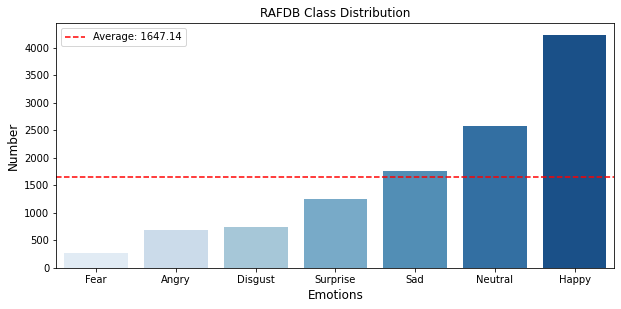

In [24]:
emotion_counts_sorted = emotion_counts.sort_values(by='number', ascending=True)

# Calculate the average count
average_count = emotion_counts['number'].mean()

# Define colors and plot
colors = sns.color_palette("Blues", len(emotion_counts_sorted))

plt.figure(figsize=(10, 4.5))
sns.barplot(x=emotion_counts_sorted.emotion, y=emotion_counts_sorted.number, palette=colors)
plt.title('RAFDB Class Distribution')
plt.ylabel('Number', fontsize=12)
plt.xlabel('Emotions', fontsize=12)

# Add a horizontal line for the average
plt.axhline(average_count, color='red', linestyle='--', linewidth=1.5, label=f'Average: {average_count:.2f}')

# Add a legend to display the average line label
plt.legend()

plt.show()

In [25]:
data_final.to_csv('D:\\Kuliah\\UPI\\SEMESTER 7\\skripsi\\dataset fix\\rafdb_clean.csv', index=False)

## AffectNet

In [28]:
data_dir = 'D:\\Kuliah\\UPI\\SEMESTER 7\\skripsi\\affectnet\\tambah_affectnet'

class_map = {
    'anger': 0,
    'disgust': 1,
    'fear': 2,
    'happy': 3,
    'sad': 4,
    'surprise': 5,
    'neutral': 6,
}

In [29]:
image_data = []
labels = []
usages = []

# Loop untuk setiap folder (kelas)
for class_folder in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_folder)

    # Pastikan folder yang diambil adalah folder valid (bukan file atau lainnya)
    if os.path.isdir(class_path):
        label = class_map[class_folder]  # Ambil label sesuai map kelas

        # Loop untuk setiap gambar dalam folder kelas tersebut
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)

            # Load gambar dengan OpenCV dalam bentuk grayscale
            image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

            # Pastikan gambar terbaca dengan benar
            if image is not None:
                # Resize gambar ke ukuran tetap jika diperlukan, misalnya 48x48
                image = cv2.resize(image, (48, 48))

                # Flatten gambar menjadi 1D array dan ubah ke string terpisah dengan spasi
                image_flat = ' '.join(map(str, image.flatten()))

                # Simpan gambar dan labelnya
                image_data.append(image_flat)
                labels.append(label)
                usages.append("Training")

In [30]:
df = pd.DataFrame({
    ' pixels': image_data,
    'emotion': labels,
    ' Usage': usages  # Kolom Usage dengan nilai "Training"
})

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27823 entries, 0 to 27822
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0    pixels  27823 non-null  object
 1   emotion  27823 non-null  int64 
 2    Usage   27823 non-null  object
dtypes: int64(1), object(2)
memory usage: 652.2+ KB


In [45]:
df.isnull().sum()

 pixels    0
emotion    0
 Usage     0
dtype: int64

In [46]:
duplicate_count = df.duplicated(subset=' pixels').sum()

print(f"Number of duplicate rows': {duplicate_count}")

Number of duplicate rows': 341


In [47]:
df[df.duplicated(subset=' pixels')]

,pixels,emotion,Usage
457,41 36 34 56 64 117 132 132 130 212 202 141 196...,0,Training
859,159 159 155 44 32 30 35 32 49 49 54 53 49 36 2...,0,Training
1039,252 252 202 177 181 174 198 215 213 230 230 23...,0,Training
1114,102 70 27 21 22 21 21 19 19 23 19 20 20 23 21 ...,0,Training
1554,255 253 254 254 253 255 255 254 254 255 255 25...,0,Training
...,...,...,...
26877,19 20 19 21 24 24 23 23 33 120 128 51 43 83 13...,5,Training
27197,19 20 19 21 24 24 23 23 33 120 128 51 43 83 13...,5,Training
27223,252 252 251 251 251 252 252 251 251 251 252 25...,5,Training
27552,86 97 104 104 97 78 66 71 82 86 69 71 81 92 81...,5,Training


In [51]:
data_new = df.drop_duplicates(subset=' pixels')

In [52]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27482 entries, 0 to 27822
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0    pixels  27482 non-null  object
 1   emotion  27482 non-null  int64 
 2    Usage   27482 non-null  object
dtypes: int64(1), object(2)
memory usage: 858.8+ KB


In [53]:
duplicate_count = data_new.duplicated(subset=' pixels').sum()

print(f"Number of duplicate rows': {duplicate_count}")

Number of duplicate rows': 0


In [54]:
data_new['face_detected'] = detect_faces(data_new)

Image: 1, Prob: 0.9857127666473389
Image: 2, Prob: 0.9998809099197388
Image: 3, Prob: 0.9930562376976013
Image: 4, Prob: 0.9908449053764343
Image: 5, Prob: 0.9971764087677002
Image: 6, Prob: 0.9972773194313049
Image: 7, Prob: 0.9963483214378357
Image: 8, Prob: 0.9913702011108398
Image: 9, Prob: 0.9582415819168091
Image: 10, Prob: 0.9889028668403625
Image: 11, Prob: 0.9754949808120728
Image: 12, Prob: 0.9945306181907654
Image: 13, Prob: 0.9997088313102722
Image: 14, Prob: 0.9977337121963501
Image: 15, Prob: 0.999901533126831
Image: 16, Prob: None
Image: 17, Prob: 0.9926502108573914
Image: 18, Prob: 0.9991546869277954
Image: 19, Prob: 0.9993484616279602
Image: 20, Prob: 0.9929353594779968
Image: 21, Prob: 0.9859446287155151
Image: 22, Prob: 0.9608457684516907
Image: 23, Prob: 0.9975504279136658
Image: 24, Prob: 0.9974321722984314
Image: 25, Prob: 0.9998339414596558
Image: 26, Prob: 0.999874472618103
Image: 27, Prob: 0.9900036454200745
Image: 28, Prob: 0.9944932460784912
Image: 29, Prob: 

C:\Users\MoKha\AppData\Local\Temp\ipykernel_4428\2567010068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['face_detected'] = detect_faces(data_new)


In [55]:
data_new[data_new['face_detected'] == 0]

,pixels,emotion,Usage,face_detected
15,57 55 56 58 61 65 72 80 61 73 72 77 81 64 71 6...,0,Training,0
124,139 95 67 78 14 15 48 21 110 69 8 68 37 14 220...,0,Training,0
230,107 244 237 113 215 140 131 127 78 151 174 100...,0,Training,0
286,186 187 190 192 195 196 200 202 204 205 207 20...,0,Training,0
300,239 239 236 215 217 216 211 207 198 189 177 15...,0,Training,0
...,...,...,...,...
27633,157 156 152 148 138 129 112 102 94 107 125 101...,5,Training,0
27652,47 54 42 30 37 32 62 44 42 56 66 65 55 61 73 8...,5,Training,0
27696,91 108 135 108 75 98 89 67 90 82 90 80 69 65 3...,5,Training,0
27719,92 91 89 91 91 92 91 93 93 96 95 92 93 92 94 9...,5,Training,0


In [56]:
data_final = data_new[data_new['face_detected'] == 1]

In [57]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27049 entries, 0 to 27822
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0    pixels        27049 non-null  object
 1   emotion        27049 non-null  int64 
 2    Usage         27049 non-null  object
 3   face_detected  27049 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.0+ MB


In [58]:
emotion_labels = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}
emotion_counts = data_final['emotion'].value_counts(sort=True).reset_index()
emotion_counts.columns = ['emotion', 'number']
emotion_counts['emotion'] = emotion_counts['emotion'].map(emotion_labels)
emotion_counts

,emotion,number
0,Neutral,5057
1,Happy,5000
2,Surprise,4161
3,Angry,3541
4,Fear,3439
5,Sad,3302
6,Disgust,2549


C:\Users\MoKha\AppData\Local\Temp\ipykernel_4428\2124918669.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotion_counts_sorted.emotion, y=emotion_counts_sorted.number, palette=colors)


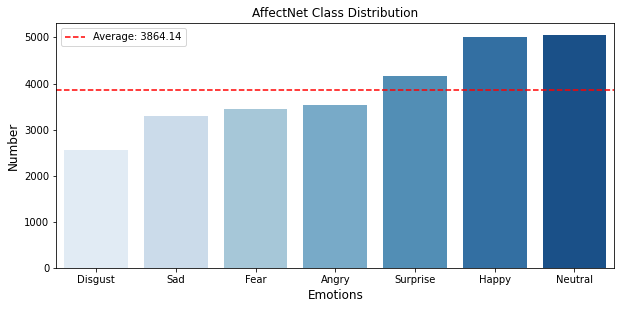

In [59]:
emotion_counts_sorted = emotion_counts.sort_values(by='number', ascending=True)

# Calculate the average count
average_count = emotion_counts['number'].mean()

# Define colors and plot
colors = sns.color_palette("Blues", len(emotion_counts_sorted))

plt.figure(figsize=(10, 4.5))
sns.barplot(x=emotion_counts_sorted.emotion, y=emotion_counts_sorted.number, palette=colors)
plt.title('AffectNet Class Distribution')
plt.ylabel('Number', fontsize=12)
plt.xlabel('Emotions', fontsize=12)

# Add a horizontal line for the average
plt.axhline(average_count, color='red', linestyle='--', linewidth=1.5, label=f'Average: {average_count:.2f}')

# Add a legend to display the average line label
plt.legend()

plt.show()

In [60]:
data_final.to_csv('D:\\Kuliah\\UPI\\SEMESTER 7\\skripsi\\dataset fix\\affectnet_clean.csv', index=False)